# Project: WeRateDogs X Account Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#g">Data Gathering</a></li>
<li><a href="#wrangling_a">Data Wrangling - Asses</a></li>
<li><a href="#wrangling_c">Data Wrangling - Clean</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
</ul>

<a id='intro'></a>
## Introduction
>
> The purpose of this notebook is to document my process as I work through the primary stages of data analysis, including data gathering, data wrangling, exploratory data analysis (EDA), visualization, and reporting. In this particular project, I will focus especially on the data gathering and reporting stages.
>
> I will explore and merge three datasets related to the WeRateDogs X account. Through this, I aim to strengthen key data analysis skills such as identifying and handling missing values, dealing with duplicates, and performing necessary data cleaning. For example, I will determine whether to remove records with missing values, impute them with appropriate placeholders, or retain them as is depending on context. I will also identify unnecessary duplicates (such as repeated entries for the same dog), and clean the data to retain only the most accurate and meaningful records.

## Questions to be Explored
- Is favorite count correlated with retweet count?
- What is the most popular dog stage?
- What is the most popular breed?
- What is the most popular dog name?

In [104]:
# Import necessary libraries
import pandas as pd  # pandas is used for data manipulation and analysis

import matplotlib.pyplot as plt  # matplotlib is used for creating visualizations

import seaborn as sns  # seaborn builds on matplotlib for prettier plots

import matplotlib as mp

import numpy as np

from collections import Counter

from collections import defaultdict

import requests as rq 

import warnings
warnings.simplefilter('ignore')

import re

import ast
# Magic Words
# To ensure that matplotlib plots are displayed directly inside the notebook instead of opening a separate cell:
%matplotlib inline

# To render higher resolution images
%config InlineBackend.figure_format = 'retina'

<a id='g'></a>
<h2 style="color:#4169E1">1. Data Gathering</h2>

In [105]:
# Read the CSV, and JSON files that were downloaded and loading them into pandas DataFrames
file_path = "twitter_archive.csv"
archive_df = pd.read_csv(file_path)
file_path = "tweet_json.json"
tweets_df = pd.read_json(file_path, lines=True)
# Read the image_predictions.tsv (which is hosted on Udacity's servers and should be downloaded programmatically) file into a DataFrame.
# Request the TSV file
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = rq.get(url)
response
# Save the file as "image-predictions.tsv"
with open("image-predictions.tsv", "wb") as f:
        f.write(response.content)
file_path = "image-predictions.tsv"
print("File downloaded successfully as image-predictions.tsv")
img_df= pd.read_csv(file_path, sep="\t")

File downloaded successfully as image-predictions.tsv


<a id='wrangling_a'></a>
---
<h2 style="color:#4169E1">2. Data Wrangling</h2>

> We'll asses each dataset on its own starting with `archive_df`
### 1. `archive_df`

---

<h3 style="color:#BA55D3">1.1 Visual Data Assesment</h3>

---
> Visually scan random columns for obvious issues.

In [106]:
# Show full text in cells
pd.set_option('display.max_colwidth', None)
# Visually asses 5 random records
archive_df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1176,719991154352222208,NaN,NaN,2016-04-12 20:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This doggo was initially thrilled when she saw the happy cartoon pup but quickly realized she'd been deceived. 10/10 https://t.co/mvnBGaWULV,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/719991154352222208/photo/1,https://twitter.com/dog_rates/status/719991154352222208/photo/1",10,10,NaN,doggo,NaN,NaN,NaN
610,797236660651966464,NaN,NaN,2016-11-12 00:36:46 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Pancake. She loves Batman and winks like a h*ckin champ. 12/10 real crowd pleaser https://t.co/6kqsAjJNhi,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/797236660651966464/photo/1,https://twitter.com/dog_rates/status/797236660651966464/photo/1",12,10,Pancake,NaN,NaN,NaN,NaN
2258,667724302356258817,NaN,NaN,2015-11-20 15:20:54 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",What a dog to start the day with. Very calm. Likes to chill by pond. Corkscrews sticking out of head. Obedient. 7/10 https://t.co/0nIxPTDWAZ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667724302356258817/photo/1,7,10,NaN,NaN,NaN,NaN,NaN
237,847157206088847362,NaN,NaN,2017-03-29 18:43:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Daisy. She's been pup for adoption for months now but hasn't gotten any applications. 11/10 let's change that\n\nhttps://t.co/Jlb9L0m3J0 https://t.co/Eh7fGFuy6r,NaN,NaN,NaN,"https://www.petfinder.com/petdetail/37334596,https://twitter.com/dog_rates/status/847157206088847362/photo/1,https://twitter.com/dog_rates/status/847157206088847362/photo/1",11,10,Daisy,NaN,NaN,NaN,NaN
2120,670411370698022913,NaN,NaN,2015-11-28 01:18:21 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Scooter. He's ready for his first day of middle school. Remarkable tongue. 12/10 https://t.co/1DJfHmfBQN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670411370698022913/photo/1,12,10,Scooter,NaN,NaN,NaN,NaN


---

<h3 style="color:#BA55D3">1.2 Programmatic Data Assesment</h3>

---

In [107]:
# View numerical statistics, including the 5-number summary and the mean
archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [108]:
# Providing a summary of the dataset, including column names, data types, and non-null value counts.
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        1611 non-null   object 
 13  doggo                       97 no

### Check for Missing Values - Completeness

In [109]:
# Counting the missing values in each column to identify areas needing cleaning.
print(f"Number of missing values in each column:\n{archive_df.isnull().sum()}")

Number of missing values in each column:
tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                           745
doggo                         2259
floofer                       2346
pupper                        2099
puppo                         2326
dtype: int64


In [110]:
# Check for the existance of dog photos or videos through the url
archive_df["expanded_urls"].sample(10)

1948                                                                                                                                    https://twitter.com/dog_rates/status/673697980713705472/photo/1,https://twitter.com/dog_rates/status/673697980713705472/photo/1
129                                                                                                                                                                                                     https://twitter.com/dog_rates/status/867421006826221569/photo/1
214     https://twitter.com/dog_rates/status/851464819735769094/photo/1,https://twitter.com/dog_rates/status/851464819735769094/photo/1,https://twitter.com/dog_rates/status/851464819735769094/photo/1,https://twitter.com/dog_rates/status/851464819735769094/photo/1
575                                                                                                                                     https://twitter.com/dog_rates/status/801115127852503040/photo/1,https://

In [111]:
print(f"In total, there are {archive_df.isnull().sum().sum()} missing values")

In total, there are 20915 missing values


### Check for Duplicate Rows

In [112]:
# Counting the number of duplicate rows in the dataset
print(f"Number of duplicated rows: {archive_df.duplicated().sum()}")

# Find duplicates based on tweet_id + timestamp
archive_df[archive_df.duplicated(subset=['tweet_id', 'timestamp'])]

Number of duplicated rows: 0


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Check the Uniqueness

In [113]:
# Check the uniqueness of tweet IDs
archive_df['tweet_id'].is_unique

True

In [114]:
# Count the number of unique URLs
print(f"There are {archive_df['expanded_urls'].nunique()} unique URLs out of {archive_df['expanded_urls'].count()}")
# Find duplicates based on expanded URLs
archive_df[archive_df.duplicated('expanded_urls')]

There are 2218 unique URLs out of 2297


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,NaN,NaN,NaN,NaN,17,10,NaN,NaN,NaN,NaN,NaN
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,NaN,NaN,NaN,NaN,NaN
75,878281511006478336,NaN,NaN,2017-06-23 16:00:04 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Meet Shadow. In an attempt to reach maximum zooming borkdrive, he tore his ACL. Still 13/10 tho. Help him out below\n\nhttps://t.co/245xJJElsY https://t.co/lUiQH219v6",NaN,NaN,NaN,"https://www.gofundme.com/3yd6y1c,https://twitter.com/dog_rates/status/878281511006478336/photo/1",13,10,Shadow,NaN,NaN,NaN,NaN
76,878057613040115712,NaN,NaN,2017-06-23 01:10:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Emmy. She was adopted today. Massive round of pupplause for Emmy and her new family. 14/10 for all involved https://t.co/cwtWnHMVpe,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/878057613040115712/photo/1,https://twitter.com/dog_rates/status/878057613040115712/photo/1",14,10,Emmy,NaN,NaN,NaN,NaN
98,873213775632977920,NaN,NaN,2017-06-09 16:22:42 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sierra. She's one precious pupper. Absolute 12/10. Been in and out of ICU her whole life. Help Sierra below\n\nhttps://t.co/Xp01EU3qyD https://t.co/V5lkvrGLdQ,NaN,NaN,NaN,"https://www.gofundme.com/help-my-baby-sierra-get-better,https://twitter.com/dog_rates/status/873213775632977920/photo/1,https://twitter.com/dog_rates/status/873213775632977920/photo/1",12,10,Sierra,NaN,NaN,pupper,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2286,667182792070062081,NaN,NaN,2015-11-19 03:29:07 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Timison. He just told an awful joke but is still hanging on to the hope that you'll laugh with him. 10/10 https://t.co/s2yYuHabWl,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667182792070062081/photo/1,10,10,Timison,NaN,NaN,NaN,NaN
2293,667152164079423490,NaN,NaN,2015-11-19 01:27:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Pipsy. He is a fluffball. Enjoys traveling the sea &amp; getting tangled in leash. 12/10 I would kill for Pipsy https://t.co/h9R0EwKd9X,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667152164079423490/photo/1,12,10,Pipsy,NaN,NaN,NaN,NaN
2294,667138269671505920,NaN,NaN,2015-11-19 00:32:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Extremely intelligent dog here. Has learned to walk like human. Even has his own dog. Very impressive 10/10 https://t.co/0DvHAMdA4V,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667138269671505920/photo/1,10,10,NaN,NaN,NaN,NaN,NaN
2298,667070482143944705,6.670655e+17,4.196984e+09,2015-11-18 20:02:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",After much debate this dog is being upgraded to 10/10. I repeat 10/10,NaN,NaN,NaN,NaN,10,10,NaN,NaN,NaN,NaN,NaN


### Check for Outliers and Extreme Values

In [115]:
# Check for outliers in numerators
archive_df['rating_numerator'].value_counts()

rating_numerator
12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: count, dtype: int64

In [116]:
rare_numerators = [
    2, 1, 75, 15, 420, 0, 80, 144, 17, 26, 20, 121, 143, 44, 60, 45,
    50, 99, 204, 1776, 165, 666, 27, 182, 24, 960, 84, 88
]

archive_df[archive_df['rating_numerator'].isin(rare_numerators)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,NaN,NaN,NaN,NaN,17,10,NaN,NaN,NaN,NaN,NaN
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,NaN,NaN,NaN,NaN,420,10,NaN,NaN,NaN,NaN,NaN
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",NaN,NaN,NaN,NaN,666,10,NaN,NaN,NaN,NaN,NaN
285,838916489579200512,NaN,NaN,2017-03-07 00:57:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @KibaDva: I collected all the good dogs!! 15/10 @dog_rates #GoodDogs https://t.co/6UCGFczlOI,8.389060e+17,8.117408e+08,2017-03-07 00:15:46 +0000,"https://twitter.com/KibaDva/status/838905980628819968/photo/1,https://twitter.com/KibaDva/status/838905980628819968/photo/1,https://twitter.com/KibaDva/status/838905980628819968/photo/1,https://twitter.com/KibaDva/status/838905980628819968/photo/1",15,10,NaN,NaN,NaN,NaN,NaN
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,NaN,NaN,NaN,NaN,NaN
291,838085839343206401,8.380855e+17,2.894131e+09,2017-03-04 17:56:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@bragg6of8 @Andy_Pace_ we are still looking for the first 15/10,NaN,NaN,NaN,NaN,15,10,NaN,NaN,NaN,NaN,NaN
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,NaN,NaN,NaN,NaN,NaN
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1",0,10,NaN,NaN,NaN,NaN,NaN
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,NaN,NaN,NaN,NaN
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,NaN,NaN,NaN,NaN,NaN


In [117]:
archive_df['rating_numerator'].value_counts().sort_values().head(10)

rating_numerator
144    1
20     1
121    1
143    1
44     1
60     1
45     1
50     1
26     1
99     1
Name: count, dtype: int64

In [118]:
# Check for outliers in denominators
archive_df['rating_denominator'].value_counts()

rating_denominator
10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: count, dtype: int64

In [119]:
archive_df[archive_df['rating_denominator'] != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,NaN,NaN,NaN,NaN,NaN
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,NaN,NaN,NaN,NaN,NaN
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,NaN,NaN,NaN,NaN,NaN
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,NaN,NaN,NaN,NaN
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,NaN,NaN,NaN,NaN,NaN
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,NaN,NaN,NaN,NaN,NaN
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,NaN,NaN,NaN,NaN,NaN
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204,170,this,NaN,NaN,NaN,NaN
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4,20,NaN,NaN,NaN,NaN,NaN
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<

In [120]:
archive_df.sort_values(by='rating_numerator', ascending=True, inplace=True)
archive_df.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1",0,10,NaN,NaN,NaN,NaN,NaN
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459439529985/photo/1,0,10,NaN,NaN,NaN,NaN,NaN
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406224695296/photo/1,1,2,an,NaN,NaN,NaN,NaN
2261,667549055577362432,NaN,NaN,2015-11-20 03:44:31 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Never seen dog like this. Breathes heavy. Tilts head in a pattern. No bark. Shitty at fetch. Not even cordless. 1/10 https://t.co/i9iSGNn3fx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667549055577362432/photo/1,1,10,NaN,NaN,NaN,NaN,NaN
2338,666104133288665088,NaN,NaN,2015-11-16 04:02:55 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10 https://t.co/Asgdc6kuLX,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666104133288665088/photo/1,1,10,NaN,NaN,NaN,NaN,NaN
605,798576900688019456,NaN,NaN,2016-11-15 17:22:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10 https://t.co/…,6.661041e+17,4.196984e+09,2015-11-16 04:02:55 +0000,https://twitter.com/dog_rates/status/666104133288665088/photo/1,1,10,NaN,NaN,NaN,NaN,NaN
1446,696490539101908992,6.964887e+17,4.196984e+09,2016-02-08 00:27:39 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",After reading the comments I may have overestimated this pup. Downgraded to a 1/10. Please forgive me,NaN,NaN,NaN,NaN,1,10,NaN,NaN,NaN,NaN,NaN
1869,675153376133427200,NaN,NaN,2015-12-11 03:21:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",What kind of person sends in a picture without a dog in it? 1/10 just because that's a nice table https://t.co/RDXCfk8hK0,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675153376133427200/photo/1,1,10,NaN,NaN,NaN,NaN,NaN
2091,670783437142401025,NaN,NaN,2015-11-29 01:56:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Flamboyant pup here. Probably poisonous. Won't eat kibble. Doesn't bark. Slow af. Petting doesn't look fun. 1/10 https://t.co/jxukeh2BeO,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670783437142401025/photo/1,1,10,NaN,NaN,NaN,NaN,NaN
2038,671550332464455680,6.715449e+17,4.196984e+09,2015-12-01 04:44:10 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",After 22 minutes of careful deliberation this dog is being demoted to a 1/10. The longer you look a

In [121]:
archive_df.sort_values(by='rating_denominator', ascending=True, inplace=True)
archive_df.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,NaN,NaN,NaN,NaN,NaN
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406224695296/photo/1,1,2,an,NaN,NaN,NaN,NaN
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,NaN,NaN,NaN,NaN
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1",0,10,NaN,NaN,NaN,NaN,NaN
667,790337589677002753,NaN,NaN,2016-10-23 23:42:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Maggie. She can hear your cells divide. 12/10 can also probably fly https://t.co/ovE2hqXryV,NaN,NaN,NaN,https://twitter.com/dog_rates/status/790337589677002753/photo/1,12,10,Maggie,NaN,NaN,NaN,NaN
670,789986466051088384,NaN,NaN,2016-10-23 00:27:05 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Happy. He's a bathtub reviewer. Seems to be pleased with this one. 12/10 https://t.co/Ln89R4FP7v,NaN,NaN,NaN,https://twitter.com/dog_rates/status/789986466051088384/photo/1,12,10,Happy,NaN,NaN,NaN,NaN
671,789960241177853952,NaN,NaN,2016-10-22 22:42:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Buddy. His father was a bear and his mother was a perfectly toasted marshmallow. 12/10 would snug so well https://t.…,7.624645e+17,4.196984e+09,2016-08-08 01:44:46 +0000,"https://twitter.com/dog_rates/status/762464539388485633/photo/1,https://twitter.com/dog_rates/status/762464539388485633/photo/1,https://twitter.com/dog_rates/status/762464539388485633/photo/1,https://twitter.com/dog_rates/status/762464539388485633/photo/1",12,10,Buddy,NaN,NaN,NaN,NaN
674,789599242079838210,NaN,NaN,2016-10-21 22:48:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Brownie. She's wearing a Halloween themed onesie. 12/10 festive af https://t.co/0R4meWXFOx,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/789599242079838210/photo/1,https://twitter.com/dog_rates/status/789599242079838210/photo/1",12,10,Brownie,NaN,NaN,NaN,NaN
675,789530877013393408,NaN,NaN,2016-10-21 18:16:44 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Rizzy. She smiles a lot. 12/10 contagious af https://t.co/TU4sZogVIq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/789530877013393408/photo/1,https://twitter.com/dog_rates/status/789530877013393408/photo/1,https://twitter.com/dog_rates/

---

## `archive_df` issues

---

## **Quality Issues**

### **Completeness**

1. **Missing dog names**

   * The `name` column has missing values (`None` or nulls).

2. **Tweets without images**

   * Tweets without images have missing or null `expanded_urls`. 

---

### **Validity**

1. **Retweets present**

   * Tweets that are retweets (non-empty `retweeted_status_id`, etc.) are included — we only want original tweets. 

2. **Erroneous datatypes in multiple columns**

   * Several columns (`tweet_id`, `rating_denominator`, `rating_numerator`, `timestamp`) have incorrect or inconsistent data types. 

3. **Nonsense dog names**

   * Dog names that clearly do not represent valid names (e.g., `a`, `an`, `the`).

4. **Timestamp not in datetime format**

   * `timestamp` is stored as an object/string rather than proper datetime. 

5. **Ratings stored as integers instead of floats**

   * `rating_numerator` and `rating_denominator` are integers, but some ratings require decimals.
---

### **Accuracy**

1. **Decimal rating numerators extracted incorrectly**

   * Some `rating_numerator` values are decimals or extreme numbers (e.g., 177.6), incorrectly extracted from text.

4. **Incorrect dog stages**

   * Some values in `doggo`, `floofer`, `pupper`, `puppo` are inaccurate or conflict (e.g., multiple stages assigned to one dog).

5. **Text column includes tweet text plus link**

   * The `text` column contains both tweet content and appended shortened URLs, which may require parsing.
 
---

## **Tidiness Issues**

1. **Dog stages are in separate columns**

   * Columns `doggo`, `floofer`, `pupper`, and `puppo` represent stages and should be in one column (`dog_stage`). This violates "each variable forms a column".

2. **Rating split into two columns**

   * `rating_numerator` and `rating_denominator` are separate, but they represent one variable (`rating`). This violates "each variable forms a column".

---

### 2. `tweets_df`
---

<h3 style="color:#BA55D3">2.1 Visual Data Assesment</h3>

---
> Visually scan random columns for obvious issues.

In [122]:
tweets_df.sample(5)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
1749,2015-12-21 17:33:48+00:00,678991772295516161,678991772295516160,If your Monday isn't going so well just take a look at this. Both 12/10 https://t.co/GJT6SILPGU,False,"[0, 95]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 678991763986624512, 'id_str': '678991763986624512', 'indices': [72, 95], 'media_url': 'http://pbs.twimg.com/media/CWxDaXHWsAAWV8W.jpg', 'media_url_https': 'https://pbs.twimg.com/media/CWxDaXHWsAAWV8W.jpg', 'url': 'https://t.co/GJT6SILPGU', 'display_url': 'pic.twitter.com/GJT6SILPGU', 'expanded_url': 'https://twitter.com/dog_rates/status/678991772295516161/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 600, 'h': 584, 'resize': 'fit'}, 'large': {'w': 638, 'h': 621, 'resize': 'fit'}, 'small': {'w': 340, 'h': 331, 'resize': 'fit'}}}]}","{'media': [{'id': 678991763986624512, 'id_str': '678991763986624512', 'indices': [72, 95], 'media_url': 'http://pbs.twimg.com/media/CWxDaXHWsAAWV8W.jpg', 'media_url_https': 'https://pbs.twimg.com/media/CWxDaXHWsAAWV8W.jpg', 'url': 'https://t.co/GJT6SILPGU', 'display_url': 'pic.twitter.com/GJT6SILPGU', 'expanded_url': 'https://twitter.com/dog_rates/status/678991772295516161/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 600, 'h': 584, 'resize': 'fit'}, 'large': {'w': 638, 'h': 621, 'resize': 'fit'}, 'small': {'w': 340, 'h': 331, 'resize': 'fit'}}}]}","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™ (author)', 'screen_name': 'dog_rates', 'location': 'DM YOUR DOGS, WE WILL RATE', 'description': '#1 Source for Professional Dog Ratings | STORE: @ShopWeRateDogs | IG, FB & SC: WeRateDogs MOBILE APP: @GoodDogsGame | Business: dogratingtwitter@gmail.com', 'url': 'https://t.co/N7sNNHAEXS', 'entities': {'url': {'urls': [{'url': 'https://t.co/N7sNNHAEXS', 'expanded_url': 'http://weratedogs.com', 'display_url': 'weratedogs.com', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 3200953, 'friends_count': 104, 'listed_count': 2805, 'created_at': 'Sun Nov 15 21:41:29 +0000 2015', 'favourites_count': 114031, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': True, 'statuses_count': 5288, 'lang': 'en', 'contributors_enabled': False, 'is_translator': False, 'is_translation_enabled': False, 'profile_background_color': '000000', 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_tile': False, 'profile_image_url': 'http://pbs.twimg.com/profile_images/861415328504569856/R2xOOfwe_normal.jpg', 'profile_image_url_https': 'https://pbs.twimg.com/profile_images/861415328504569856/R2xOOfwe_normal.jpg', 'profile_banner_url': 'https://pbs.twimg.com/profile_banners/4196983835/1501129017', 'profile_link_color': 'F5ABB5', 'profile_sidebar_border_color': '000000', 'profile_sidebar_fill_color': '000000', 'profile_text_color': '000000', 'profile_use_background_image': False, 'has_extended_profile': True, 'default_profile': False, 'default_profile_image': False, 'following': True, 'follow_request_sent': False, 'notifications': False, 'translator_type': 'none'}",NaN,NaN,None,NaN,False,1333,2537,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
591,2016-11-16 17:01:16+00:00,798933969379225600,798933969379225600,This is Iroh. 

---

<h3 style="color:#BA55D3">2.2 Programmatic Data Assesment</h3>

---

In [123]:
# View numerical statistics, including the 5-number summary and the mean
tweets_df.describe()

,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,geo,coordinates,contributors,retweet_count,favorite_count,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str
count,2.354000e+03,2.354000e+03,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,0.0,0.0,0.0,2354.000000,2354.000000,2211.0,2211.0,2.900000e+01,2.900000e+01
mean,7.426978e+17,7.426978e+17,7.455079e+17,7.455079e+17,2.014171e+16,2.014171e+16,NaN,NaN,NaN,3164.797366,8080.968564,0.0,0.0,8.162686e+17,8.162686e+17
std,6.852812e+16,6.852812e+16,7.582492e+16,7.582492e+16,1.252797e+17,1.252797e+17,NaN,NaN,NaN,5284.770364,11814.771334,0.0,0.0,6.164161e+16,6.164161e+16
min,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,NaN,NaN,NaN,0.000000,0.000000,0.0,0.0,6.721083e+17,6.721083e+17
25%,6.783975e+17,6.783975e+17,6.757419e+17,6.757419e+17,3.086374e+08,3.086374e+08,NaN,NaN,NaN,624.500000,1415.000000,0.0,0.0,7.888183e+17,7.888183e+17
50%,7.194596e+17,7.194596e+17,7.038708e+17,7.038708e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,1473.500000,3603.500000,0.0,0.0,8.340867e+17,8.340867e+17
75%,7.993058e+17,7.993058e+17,8.257804e+17,8.257804e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,3652.000000,10122.250000,0.0,0.0,8.664587e+17,8.664587e+17
max,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,NaN,NaN,NaN,79515.000000,132810.000000,0.0,0.0,8.860534e+17,8.860534e+17


In [124]:
# Providing a summary of the dataset, including column names, data types, and non-null value counts.
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

### Check for Missing Values - Completeness

In [125]:
# Counting the missing values in each column to identify areas needing cleaning.
print(f"Number of missing values in each column:\n{tweets_df.isnull().sum()}")

Number of missing values in each column:
created_at                          0
id                                  0
id_str                              0
full_text                           0
truncated                           0
display_text_range                  0
entities                            0
extended_entities                 281
source                              0
in_reply_to_status_id            2276
in_reply_to_status_id_str        2276
in_reply_to_user_id              2276
in_reply_to_user_id_str          2276
in_reply_to_screen_name          2276
user                                0
geo                              2354
coordinates                      2354
place                            2353
contributors                     2354
is_quote_status                     0
retweet_count                       0
favorite_count                      0
favorited                           0
retweeted                           0
possibly_sensitive                143
possibly_

In [126]:
print(f"In total, there are {tweets_df.isnull().sum().sum()} missing values")

In total, there are 30513 missing values


### Uniqueness

In [127]:
print(f"There are {tweets_df['id'].nunique()} unique IDs out of {tweets_df['id'].count()}")

There are 2354 unique IDs out of 2354


### Validity

In [128]:
print("Data types:\n", tweets_df.dtypes)

Data types:
 created_at                       datetime64[ns, UTC]
id                                             int64
id_str                                         int64
full_text                                     object
truncated                                       bool
display_text_range                            object
entities                                      object
extended_entities                             object
source                                        object
in_reply_to_status_id                        float64
in_reply_to_status_id_str                    float64
in_reply_to_user_id                          float64
in_reply_to_user_id_str                      float64
in_reply_to_screen_name                       object
user                                          object
geo                                          float64
coordinates                                  float64
place                                         object
contributors                     

---

## `tweets_df` issues

---
## **Quality Issues**
### **Validity** 
1. **Erroneous datatype (`tweet_id`)**

   * `tweet_id` column has incorrect datatype (should be string/object to preserve full precision of large IDs, but may be stored as integer or float).

### **Consistency**
1. **Inconsistent primary key naming**

   * `id` should be renamed as `tweet_id` to be consistent with other ids from different tables for the future joining/merging.

## **Tidiness Issues**
1. **Unnecessary Separation**
   * information should be included in the main archive table, there is no reason to have it in a separate data frame
2. **Irrelevant columns**
   * Retain only relevant columns needed for analysis and merging. The rest are irrelevant for this project.
3. **Redundant content**
   * `id_str` & `id` are the same thing.

### 3. `img_df`
---

<h3 style="color:#BA55D3">3.1 Visual Data Assesment</h3>

--- 
> Visually scan random columns for obvious issues.

In [129]:
# Visually asses 5 random records
img_df.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
91,667544320556335104,https://pbs.twimg.com/media/CUOYBbbWIAAXQGU.jpg,1,Pomeranian,0.412893,True,Pembroke,0.312958,True,Chihuahua,0.071960,True
1032,711652651650457602,https://pbs.twimg.com/media/CeBMT6-WIAA7Qqf.jpg,1,llama,0.856789,False,Arabian_camel,0.098727,False,neck_brace,0.016377,False
1534,790277117346975746,https://pbs.twimg.com/media/Cveg1-NXgAASaaT.jpg,1,Labrador_retriever,0.427742,True,Great_Dane,0.190503,True,curly-coated_retriever,0.146427,True
1943,861383897657036800,https://pbs.twimg.com/media/C_RAFTxUAAAbXjV.jpg,1,Cardigan,0.771008,True,Pembroke,0.137174,True,French_bulldog,0.063309,True
63,667165590075940865,https://pbs.twimg.com/media/CUI_kHBWsAAAef5.jpg,1,miniature_pinscher,0.140173,True,Rottweiler,0.134094,True,beagle,0.081900,True


In [130]:
img_df.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [131]:
img_df.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


---

<h3 style="color:#BA55D3">3.2 Programmatic Data Assesment</h3>

---

In [132]:
# View numerical statistics, including the 5-number summary and the mean
img_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [133]:
# Providing a summary of the dataset, including column names, data types, and non-null value counts.
img_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### Check for Missing Values - Completeness

In [134]:
# Counting the missing values in each column to identify areas needing cleaning.
print(f"Number of missing values in each column:\n{img_df.isnull().sum()}")

Number of missing values in each column:
tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64


### Check for Duplicate Rows

In [135]:
print(f"In total, there are {img_df.isnull().sum().sum()} missing values")

In total, there are 0 missing values


In [136]:
# Counting the number of duplicate rows in the dataset
print(f"Number of duplicated rows: {img_df.duplicated().sum()}")

# Find duplicates based on tweet_id + jpg_url
img_df[img_df.duplicated(subset=['tweet_id', 'jpg_url'])]

Number of duplicated rows: 0


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


### Uniqueness

In [137]:
# Check the uniqueness of tweet IDs
img_df['tweet_id'].is_unique

True

---

## `img_df` issues

---
## **Quality Issues**
### **Validity**

1. **Erroneous datatype (`tweet_id`)**

   * `tweet_id` column has incorrect datatype (should be string/object to preserve full precision of large IDs, but may be stored as integer or float).

---
## **Tidiness Issues**
1. **Unnecessary Separation**
   * Image predictions table should be added to twitter archive table

<a id='wrangling_c'></a>
---

<h3 style="color:#BA55D3">Cleaning Data</h3>

---

### **The Define-Code-Test Framework**
**The Define-Code-Test Framework helps organize how we clean data.**

* Define: I explain the problem.

* Code: I write the code that fixes the problem.

* Test: I check if the problem is fixed.

In [138]:
# Make copies for all datasets
archive_df_clean = archive_df.copy()
img_df_clean = img_df.copy()
tweets_df_clean = tweets_df.copy()

### 1. `archive_df`
1. Remove retweets
   
**Define:**

Retweets were present in the dataset; only original tweets should be kept.

In [139]:
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2356 entries, 313 to 1120
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        1611 non-null   object 
 13  doggo                       97 non-n

**Code:**

In [140]:
# Keep only original tweets
archive_df_clean = archive_df_clean[archive_df_clean['retweeted_status_id'].isnull()]

**Test:**

In [141]:
# Test if we successfuly removed all retweets
archive_df_clean['retweeted_status_id'].notnull().value_counts()

retweeted_status_id
False    2175
Name: count, dtype: int64

In [142]:
list(archive_df_clean)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [143]:
# Eliminate all columns related to retweets that we will not need anymore
archive_df_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

In [144]:
list(archive_df_clean)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

2. Remove tweets without images
   
**Define:**

Some tweets did not contain any images (expanded_urls null).

**Code:**

In [145]:
archive_df_clean = archive_df_clean[archive_df_clean['expanded_urls'].notnull()]

In [146]:
archive_df_clean = archive_df_clean[archive_df_clean['expanded_urls'].str.contains('/photo/', na=False)]

**Test:**

In [147]:
archive_df_clean['expanded_urls'].isnull().value_counts()

expanded_urls
False    1920
Name: count, dtype: int64

In [148]:
archive_df_clean.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
353,831309418084069378,NaN,NaN,2017-02-14 01:09:44 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Scooter and his son Montoya. Scooter is a wonderful father. He takes very good care of Montoya. Both 12/10 would pet at same time https://t.co/ghqMfxxa4V,https://twitter.com/dog_rates/status/831309418084069378/photo/1,12,10,Scooter,NaN,NaN,NaN,NaN
1099,735991953473572864,NaN,NaN,2016-05-27 00:32:10 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Maxaroni. He's curly af. Also rather fabulous. 11/10 would hug well https://t.co/A216OjIdca,"https://twitter.com/dog_rates/status/735991953473572864/photo/1,https://twitter.com/dog_rates/status/735991953473572864/photo/1,https://twitter.com/dog_rates/status/735991953473572864/photo/1",11,10,Maxaroni,NaN,NaN,NaN,NaN
1331,705591895322394625,NaN,NaN,2016-03-04 03:13:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","""Ma'am, for the last time, I'm not authorized to make that type of transaction"" 11/10 https://t.co/nPTBsdm3BF",https://twitter.com/dog_rates/status/705591895322394625/photo/1,11,10,NaN,NaN,NaN,NaN,NaN
918,756651752796094464,NaN,NaN,2016-07-23 00:46:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Gert. He just wants you to be happy. 11/10 would pat on the head so damn well https://t.co/l0Iwj6rLFW,https://twitter.com/dog_rates/status/756651752796094464/photo/1,11,10,Gert,NaN,NaN,NaN,NaN
991,748699167502000129,NaN,NaN,2016-07-01 02:06:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Tripp. He's being eaten by a sherk and doesn't even care. Unfazed af. 11/10 keep doin you Tripp https://t.co/gGxjthmG1c,"https://twitter.com/dog_rates/status/748699167502000129/photo/1,https://twitter.com/dog_rates/status/748699167502000129/photo/1",11,10,Tripp,NaN,NaN,NaN,NaN
993,748575535303884801,NaN,NaN,2016-06-30 17:54:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is one of the most reckless puppers I've ever seen. How she got a license in the first place is beyond me. 6/10 https://t.co/z5bAdtn9kd,https://twitter.com/dog_rates/status/748575535303884801/photo/1,6,10,one,NaN,NaN,NaN,NaN
1442,696754882863349760,NaN,NaN,2016-02-08 17:58:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Reptar. He specifically asked for his skis to have four bindings. He's not happy. Quite perturbed tbh. 10/10 https://t.co/l9k7TPP7Tp,https://twitter.com/dog_rates/status/696754882863349760/photo/1,10,10,Reptar,NaN,NaN,NaN,NaN
892,759447681597108224,NaN,NaN,2016-07-30 17:56:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Oakley. He has no idea what happened here. Even offered to help clean it up. 11/10 such a heckin good boy https://t.co/vT3JM8b989,https://twitter.com/dog_rates/status/759447681597108224/photo/1,11,10,Oakley,NaN,NaN,NaN,NaN
344,832032802820481025,NaN,NaN,2017-02-16 01:04:13 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Miguel. He was the only remaining doggo at the adoption center after the weekend. Let's change that. 12/10\n\nhttps://t.co/P0bO8mCQwN https://t.co/SU4K34NT4M,"https://www.petfinder.com/petdetail/34918210,https://twitter.com/dog_rates/status/832032802820481025/photo/1,https://twitter.com/dog_rates/status/832032802820481025/photo/1,https://twitter.com/dog_rates/status/832032802820481025/photo/1,https://twitter.com/dog_rates/status/832032802820481025/photo/1",12,10,Miguel,doggo,NaN,NaN,NaN
1490,692901601640583168,NaN,NaN,2016-01-29 02:46:29 +0000,"<a h

 3. Convert `tweet_id` to string
    
**Define:**

`tweet_id` is stored as an integer. Since tweet IDs are large numbers and are not used for calculations, it's better to store them as strings to preserve full precision and prevent issues with leading zeros or overflow.

**Code:**

In [149]:
archive_df_clean['tweet_id'] = archive_df_clean['tweet_id'].astype(str)

**Test:**

In [150]:
archive_df_clean.tweet_id.dtype

dtype('O')

4. Convert timestamp to datetime
   
**Define:**

The timestamp column is stored as a string (object). In order to work with dates, it needs to be converted to pandas datetime format.

**Code:**

In [151]:
archive_df_clean['timestamp'] = pd.to_datetime(archive_df_clean['timestamp'], errors='coerce')

**Test:**

In [152]:
archive_df_clean.timestamp.dtype

datetime64[ns, UTC]

5. Convert numeric fields to proper numeric type

**Define:**

The columns `rating_numerator` and `rating_denominator` are stored as integers. But some ratings may have decimal values (like 13.5/10). We need to convert them to floats so they can store decimal numbers correctly.

**Code:**

In [153]:
# Convert to float type (even if already numeric, this will cast integers to floats)
archive_df_clean['rating_numerator'] = archive_df_clean['rating_numerator'].astype(float)
archive_df_clean['rating_denominator'] = archive_df_clean['rating_denominator'].astype(float)

**Test:**

In [154]:
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1920 entries, 2335 to 1120
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1920 non-null   object             
 1   in_reply_to_status_id  21 non-null     float64            
 2   in_reply_to_user_id    21 non-null     float64            
 3   timestamp              1920 non-null   datetime64[ns, UTC]
 4   source                 1920 non-null   object             
 5   text                   1920 non-null   object             
 6   expanded_urls          1920 non-null   object             
 7   rating_numerator       1920 non-null   float64            
 8   rating_denominator     1920 non-null   float64            
 9   name                   1410 non-null   object             
 10  doggo                  65 non-null     object             
 11  floofer                7 non-null      object             

### 2. `tweets_df`
1. Rename id to tweet_id for consistency

**Define:**

The column for tweet ID is named `id` instead of `tweet_id`. For consistency across all dataframes, we rename it to `tweet_id`.

In [155]:
tweets_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

**Code:**

In [156]:
tweets_df_clean.rename(columns={'id': 'tweet_id'}, inplace=True)

**Test:**'

In [157]:
'tweet_id' in archive_df_clean.columns

True

2. Convert tweet_id to string (avoid precision loss)
   
**Define:**

`tweet_id` is stored as an integer. Since tweet IDs are large numbers and are not used for calculations, it's better to store them as strings to preserve full precision and prevent issues with leading zeros or overflow.

**Code:**

In [158]:
tweets_df_clean['tweet_id'] = tweets_df_clean['tweet_id'].astype(str)

**Test:**

In [159]:
tweets_df_clean['tweet_id'].dtype

dtype('O')

3. Remove irrelevant columns

**Define:**

The `tweets_df_clean` dataframe includes many extra columns that are not needed for this project. Only `tweet_id`, `retweet_count`, and `favorite_count` are relevant for the final master dataset.

**Code:**

In [160]:
tweets_df_clean = tweets_df_clean[['tweet_id', 'retweet_count', 'favorite_count']]

**Test:**

In [161]:
list(tweets_df_clean)

['tweet_id', 'retweet_count', 'favorite_count']

### 3. `img_df`
1. Remove rows without images (jpg_url null)

**Define:**

Some rows in `img_df_clean` do not have images (the `jpg_url` column is null). Since images are essential for this analysis, we remove these rows.

**Code:**

In [162]:
img_df_clean = img_df_clean[img_df_clean['jpg_url'].notnull()]

**Test:**

In [163]:
img_df_clean.jpg_url.notnull().value_counts()

jpg_url
True    2075
Name: count, dtype: int64

2. Convert tweet_id to string

**Define:**

`tweet_id` is stored as an integer. Since tweet IDs are large numbers and are not used for calculations, it's better to store them as strings to preserve full precision and prevent issues with leading zeros or overflow.

**Code:**

In [164]:
img_df_clean['tweet_id'] = img_df_clean['tweet_id'].astype(str)

**Test:**

In [165]:
img_df_clean.tweet_id.dtype

dtype('O')

### **Merging the pre-cleaned DFs into the master DF**
> Pre-cleaned to avoid any errors while merging

**Define:**

We need to merge `archive_df_clean`, `image_df_clean`, and `tweets_df_clean` into one master dataframe for final analysis.

**Code:**

In [166]:
# Check the consistency of primary key names accros the DFs
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1920 entries, 2335 to 1120
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1920 non-null   object             
 1   in_reply_to_status_id  21 non-null     float64            
 2   in_reply_to_user_id    21 non-null     float64            
 3   timestamp              1920 non-null   datetime64[ns, UTC]
 4   source                 1920 non-null   object             
 5   text                   1920 non-null   object             
 6   expanded_urls          1920 non-null   object             
 7   rating_numerator       1920 non-null   float64            
 8   rating_denominator     1920 non-null   float64            
 9   name                   1410 non-null   object             
 10  doggo                  65 non-null     object             
 11  floofer                7 non-null      object             

In [167]:
tweets_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


In [168]:
img_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [169]:
# Merge archive and image predictions first
archive_img_clean = pd.merge(archive_df_clean, img_df_clean, on='tweet_id', how='left')

# Merge with tweets_df_clean
master_df = pd.merge(archive_img_clean, tweets_df_clean, on='tweet_id', how='left')


**Test:**

In [170]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1920 entries, 0 to 1919
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1920 non-null   object             
 1   in_reply_to_status_id  21 non-null     float64            
 2   in_reply_to_user_id    21 non-null     float64            
 3   timestamp              1920 non-null   datetime64[ns, UTC]
 4   source                 1920 non-null   object             
 5   text                   1920 non-null   object             
 6   expanded_urls          1920 non-null   object             
 7   rating_numerator       1920 non-null   float64            
 8   rating_denominator     1920 non-null   float64            
 9   name                   1410 non-null   object             
 10  doggo                  65 non-null     object             
 11  floofer                7 non-null      object           

### **Post-merge Cleaning**
1. Remove URL from `text`

**Define:**

The `text` column includes the tweet text plus a URL at the end. Since the URL is not needed for the analysis, we remove it from the text.

**Code:**

In [171]:
master_df['text'] = master_df['text'].apply(lambda x: re.split(r'https://.*', str(x))[0])

**Test:**

In [172]:
master_df.text.sample(10)

476                                                                                  This is Tucker. He would like a hug. 13/10 someone hug him 
634                                                                                     Here's a doggo struggling to cope with the winds. 13/10 
180      This is Lili. She can't believe you betrayed her with bath time. Never looking you in the eye again. 12/10 would puppologize profusely 
858                                                   Here's an anonymous doggo that appears to be very done with Christmas. 11/10 cheer up pup 
1376                       Meet Pubert. He's a Kerplunk Rumplestilt. Cannot comprehend flower. Flawless tongue. 8/10 would pat head approvingly 
158                        This is Rontu. He is described as a pal, cuddle bug, protector and constant shadow. 12/10, but he needs your help\n\n
511                                    Here is a perfect example of someone who has their priorities in order. 13/10 for both owne

2. Find tweets where the predicted animal is a dog with maximum confidence

**Define:**

The dataset includes three predictions for each image (`p1`, `p2`, `p3`) with their corresponding confidence scores (`p1_conf`, `p2_conf`, `p3_conf`).
We want to find which prediction has the highest confidence only when it predicts a dog (`p1_dog`, `p2_dog`, `p3_dog`).
If no dog was predicted at all, we want to ignore that row.

**Code:**

In [173]:
# Keep the p_dog and p_conf where p_dog = True and p_conf = max
# Check the count of each row group of p_dog
master_df.groupby(['p1_dog', 'p2_dog', 'p3_dog']).count()['tweet_id']

p1_dog  p2_dog  p3_dog
False   False   False      289
                True        61
        True    False       49
                True        92
True    False   False       40
                True        83
        True    False      140
                True      1166
Name: tweet_id, dtype: int64

In [174]:
# Get the confidence columns from the dataframe
confidences = master_df[['p1_conf', 'p2_conf', 'p3_conf']].values

# Get the dog predictions columns from the dataframe
dogs = master_df[['p1_dog', 'p2_dog', 'p3_dog']].values

# We want to ignore predictions where it's not a dog
# So if it's not a dog, we put -1 for the confidence (because confidence is between 0 and 1, so -1 is always smaller)
confidences_dog_only = np.where(dogs == True, confidences, -1)

# Find which column (p1, p2, or p3) has the highest confidence for each row
max_dog_conf_idx = np.argmax(confidences_dog_only, axis=1)

# Now get the confidence value for the highest confidence dog prediction
max_dog_conf = []
for i in range(len(confidences)):
    max_conf = confidences[i][max_dog_conf_idx[i]]
    max_dog_conf.append(max_conf)

# Check if there was at least one dog prediction (if max confidence is not -1)
has_dog_prediction = []
for i in range(len(confidences_dog_only)):
    if np.max(confidences_dog_only[i]) != -1:
        has_dog_prediction.append(True)
    else:
        has_dog_prediction.append(False)

# Add these new columns to the dataframe
master_df['p_conf'] = max_dog_conf
master_df['p_dog'] = has_dog_prediction

# Keep only rows where we have at least one dog prediction
master_df = master_df[master_df.p_dog == True]

# Get the breed columns as an array
breeds = master_df[['p1', 'p2', 'p3']].values

# Get the predicted breed corresponding to max dog confidence
max_dog_breed = []
for i in range(len(breeds)):
    breed = breeds[i][max_dog_conf_idx[i]]
    max_dog_breed.append(breed)

# Add the new column 'p' to the dataframe
master_df['p'] = max_dog_breed

**Test:**

In [175]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
master_df.sample(12)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,p_conf,p_dog,p
38,796387464403357696,NaN,NaN,2016-11-09 16:22:22+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Snicku. He's having trouble reading because he's a dog. Glasses only helped a little. Nap preferred. 12/10 would snug well,"https://twitter.com/dog_rates/status/796387464403357696/photo/1,https://twitter.com/dog_rates/status/796387464403357696/photo/1",12.0,10.0,Snicku,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/Cw1WKu1UQAAvWsu.jpg,1,Pekinese,0.461164,True,Pomeranian,0.288650,True,Siamese_cat,0.052423,False,4861,12334,0.461164,True,Pekinese
570,822872901745569793,NaN,NaN,2017-01-21 18:26:02+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a super supportive puppo participating in the Toronto #WomensMarch today. 13/10,https://twitter.com/dog_rates/status/822872901745569793/photo/1,13.0,10.0,NaN,NaN,NaN,NaN,puppo,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,1,Lakeland_terrier,0.196015,True,Labrador_retriever,0.160329,True,Irish_terrier,0.069126,True,48265,132810,0.196015,True,Labrador_retriever
1738,766793450729734144,NaN,NaN,2016-08-20 00:26:19+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Rufus. He just missed out on the 100m final at Rio. Already training hard for Tokyo. 10/10 never give pup,https://twitter.com/dog_rates/status/766793450729734144/photo/1,10.0,10.0,Rufus,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/CqQykxrWYAAlD8g.jpg,1,beagle,0.451697,True,basset,0.197513,True,bloodhound,0.072699,True,1565,5650,0.451697,True,beagle
13,790698755171364864,NaN,NaN,2016-10-24 23:37:28+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Mosby. He appears to be rather h*ckin snuggable af. 12/10 keep it up Mosby,https://twitter.com/dog_rates/status/790698755171364864/photo/1,12.0,10.0,Mosby,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/CvkgUjbUsAEvo7l.jpg,1,Bernese_mountain_dog,0.996541,True,EntleBucher,0.001057,True,Appenzeller,0.000998,True,2203,9158,0.996541,True,EntleBucher
494,765395769549590528,NaN,NaN,2016-08-16 03:52:26+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is my dog. Her name is Zoey. She knows I've been rating other dogs. She's not happy. 13/10 no bias at all,https://twitter.com/dog_rates/status/765395769549590528/photo/1,13.0,10.0,my,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/Cp87Y0jXYAQyjuV.jpg,1,Pembroke,0.509491,True,Cardigan,0.330401,True,Shetland_sheepdog,0.038875,True,3127,20539,0.509491,True,Pembroke
564,856282028240666624,NaN,NaN,2017-04-23 23:01:59+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Cermet, Paesh, and Morple. They are absolute h*ckin superstars. Watered every day so they can grow. 14/10 for all","https://twitter.com/dog_rates/status/856282028240666624/photo/1,https://twitter.com/dog_rates/status/856282028240666624/photo/1,https://twitter.com/dog_rates/status/856282028240666624/photo/1,https://twitter.com/dog_rates/status/856282028240666624/photo/1",14.0,10.0,Cermet,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/C-If9ZwXoAAfDX2.jpg,4,Chihuahua,0.876543,True,Italian_greyhound,0.032962,True,Cardigan,0.020776,True,6841,29086,0.876543,True,Chihuahua
844,842846295480000512,NaN,NaN,2017-03-17 21:13:10+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Charlie. He's wishing you a very fun and safe St. Pawtrick's Day. 13/10 festive af,https://twitter.com/dog_rates/status/842846295480000512/photo/1,13.0,10.0,Charlie,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/C7JkO0rX0AErh

**Code ×2:**

In [176]:
# Drop the columns we no longer need
master_df = master_df.drop(columns=['p1_conf', 'p1_dog', 'p2_conf', 'p2_dog', 'p3_conf', 'p3_dog'])

**Test ×2:**

In [177]:
list(master_df)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'jpg_url',
 'img_num',
 'p1',
 'p2',
 'p3',
 'retweet_count',
 'favorite_count',
 'p_conf',
 'p_dog',
 'p']

**Code ×3:**

In [178]:
master_df.drop(columns=['p1', 'p2', 'p3'], inplace=True)

**Test ×3:**

In [179]:
list(master_df)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'jpg_url',
 'img_num',
 'retweet_count',
 'favorite_count',
 'p_conf',
 'p_dog',
 'p']

3. Remove duplicate URL columns

**Define:**

The dataframe contains two columns (img_url and expanded_urls) that both hold the image URLs. Since expanded_urls has already been used, we no longer need img_url.
To keep the dataset tidy and avoid duplicate information, we will drop img_url.

**Code:**

In [180]:
master_df = master_df.drop(columns=['jpg_url'])

**Test:**

In [181]:
list(master_df)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'img_num',
 'retweet_count',
 'favorite_count',
 'p_conf',
 'p_dog',
 'p']

4. Remove irrelevant identifier columns

**Define:**

Some columns are not useful for the analysis and don't provide any meaningful information (such as img_num, in_reply_to_status_id, in_reply_to_user_id, and source).
We will drop them to simplify the dataset and keep only relevant data.

**Code:**

In [182]:
# img_num is useless to keep, and more than 80% of in_reply_to_status_id, and in_reply_to_user_id are missing, source contains the same piece of information on each row
master_df.drop(columns=['img_num', 'in_reply_to_status_id', 'in_reply_to_user_id', 'source'], inplace = True)

**Test:**

In [183]:
list(master_df)

['tweet_id',
 'timestamp',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'retweet_count',
 'favorite_count',
 'p_conf',
 'p_dog',
 'p']

5. Handling nonsense and missing dog names

**Define:**

Some dog names are nonsense (like 'a', 'an', 'the', 'my', 'actually', etc.) because they were incorrectly extracted from the tweet text.
Other rows have missing names (NaN).
We will replace nonsense names and missing names with 'Unknown' and correct the names if it was mentioned in the tweet's text.

**Code:**

In [184]:
weird_names = [
    'a', 'an', 'the', 'my', 'just', 'getting', 'very', 'one',
    'not', 'all', 'actually', 'quite', 'infuriating',
    'unacceptable', 'incredibly', 'space', 'O', 'Bookstore', 'space',
]

In [185]:
weird_rows = master_df[master_df['name'].isin(weird_names)]
len(weird_rows)

76

In [186]:
weird_rows

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,p_conf,p_dog,p
0,666287406224695296,2015-11-16 16:11:11+00:00,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10,https://twitter.com/dog_rates/status/666287406224695296/photo/1,1.0,2.0,an,NaN,NaN,NaN,NaN,71,152,0.857531,True,Maltese_dog
179,855459453768019968,2017-04-21 16:33:22+00:00,"Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective","https://twitter.com/dog_rates/status/855459453768019968/photo/1,https://twitter.com/dog_rates/status/855459453768019968/photo/1",12.0,10.0,quite,NaN,NaN,NaN,NaN,8987,31657,0.389513,True,Blenheim_spaniel
231,746872823977771008,2016-06-26 01:08:52+00:00,This is a carrot. We only rate dogs. Please only send in dogs. You all really should know this by now ...11/10,"https://twitter.com/dog_rates/status/746872823977771008/photo/1,https://twitter.com/dog_rates/status/746872823977771008/photo/1",11.0,10.0,a,NaN,NaN,NaN,NaN,2429,6593,0.540201,True,Pembroke
305,674082852460433408,2015-12-08 04:27:30+00:00,This is a Sagitariot Baklava mix. Loves her new hat. 11/10 radiant pup,https://twitter.com/dog_rates/status/674082852460433408/photo/1,11.0,10.0,a,NaN,NaN,NaN,NaN,186,804,0.666957,True,Pomeranian
321,667470559035432960,2015-11-19 22:32:36+00:00,This is a northern Wahoo named Kohl. He runs this town. Chases tumbleweeds. Draws gun wicked fast. 11/10 legendary,https://twitter.com/dog_rates/status/667470559035432960/photo/1,11.0,10.0,a,NaN,NaN,NaN,NaN,102,273,0.304175,True,toy_poodle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1833,668507509523615744,2015-11-22 19:13:05+00:00,This is a Birmingham Quagmire named Chuk. Loves to relax and watch the game while sippin on that iced mocha. 10/10,https://twitter.com/dog_rates/status/668507509523615744/photo/1,10.0,10.0,a,NaN,NaN,NaN,NaN,116,345,0.055379,True,Shetland_sheepdog
1845,704859558691414016,2016-03-02 02:43:09+00:00,Here is a heartbreaking scene of an incredible pupper being laid to rest. 10/10 RIP pupper,https://twitter.com/dog_rates/status/704859558691414016/photo/1,10.0,10.0,a,NaN,NaN,pupper,NaN,612,2462,0.284428,True,pug
1855,669564461267722241,2015-11-25 17:13:02+00:00,This is a Coriander Baton Rouge named Alfredo. Loves to cuddle with smaller well-dressed dog. 10/10 would hug lots,https://twitter.com/dog_rates/status/669564461267722241/photo/1,10.0,10.0,a,NaN,NaN,NaN,NaN,133,413,0.623685,True,toy_poodle
1872,673636718965334016,2015-12-06 22:54:44+00:00,This is a Lofted Aphrodisiac Terrier named Kip. Big fan of bed n breakfasts. Fits perfectly. 10/10 would pet firmly,https://twitter.com/dog_rates/status/673636718965334016/photo/1,10.0,10.0,a,NaN,NaN,NaN,NaN,404,1194,0.019044,True,wombat


In [187]:
# create a dictionary of tweet_id : name pairs
name_corrections = {
    '667470559035432960': 'Kohl',
    '765395769549590528': 'Zoey',
    '828650029636317184': 'Grace',
    '671789708968640512': 'Space Pup',
    '671147085991960577': 'Rufus',
    '670303360680108032': 'Hemry',
    '667538891197542400': 'Klint',
    '670427002554466305': 'Spork',
    '667861340749471744': 'Cheryl',
    '747600769478692864': 'Bookstore and Seaweed',
    '776201521193218049': "O'Malley",
    '667773195014021121': 'Jessiga',
    '667177989038297088': 'Daryl',
    '666701168228331520': 'Johm',
    '668171859951755264': 'Alfonso',
    '675706639471788032': 'Wylie',
    '671743150407421952': 'Jacob',
    '668636665813057536': 'Berta',
    '668955713004314625': 'Leroi',
    '666781792255496192': 'Octaviath',
    '668507509523615744': 'Chuk',
    '669564461267722241': 'Alfredo',
    '673636718965334016': 'Kip'
}

# apply the corrections
master_df['name'] = master_df.apply(lambda row: name_corrections[row['tweet_id']] if row['tweet_id'] in name_corrections else row['name'], axis=1)

In [188]:
weird_rows = master_df[master_df['name'].isin(weird_names)]
len(weird_rows)

53

In [189]:
weird_rows

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,p_conf,p_dog,p
0,666287406224695296,2015-11-16 16:11:11+00:00,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10,https://twitter.com/dog_rates/status/666287406224695296/photo/1,1.0,2.0,an,NaN,NaN,NaN,NaN,71,152,0.857531,True,Maltese_dog
179,855459453768019968,2017-04-21 16:33:22+00:00,"Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective","https://twitter.com/dog_rates/status/855459453768019968/photo/1,https://twitter.com/dog_rates/status/855459453768019968/photo/1",12.0,10.0,quite,NaN,NaN,NaN,NaN,8987,31657,0.389513,True,Blenheim_spaniel
231,746872823977771008,2016-06-26 01:08:52+00:00,This is a carrot. We only rate dogs. Please only send in dogs. You all really should know this by now ...11/10,"https://twitter.com/dog_rates/status/746872823977771008/photo/1,https://twitter.com/dog_rates/status/746872823977771008/photo/1",11.0,10.0,a,NaN,NaN,NaN,NaN,2429,6593,0.540201,True,Pembroke
305,674082852460433408,2015-12-08 04:27:30+00:00,This is a Sagitariot Baklava mix. Loves her new hat. 11/10 radiant pup,https://twitter.com/dog_rates/status/674082852460433408/photo/1,11.0,10.0,a,NaN,NaN,NaN,NaN,186,804,0.666957,True,Pomeranian
394,681297372102656000,2015-12-28 02:15:26+00:00,This is actually a lion. We only rate dogs. For the last time please only send dogs. Thank u.\n12/10 would still pet,https://twitter.com/dog_rates/status/681297372102656000/photo/1,12.0,10.0,actually,NaN,NaN,NaN,NaN,1091,3490,0.482401,True,Lhasa
397,676613908052996102,2015-12-15 04:05:01+00:00,This is the saddest/sweetest/best picture I've been sent. 12/10 😢🐶,https://twitter.com/dog_rates/status/676613908052996102/photo/1,12.0,10.0,the,NaN,NaN,NaN,NaN,219,1183,0.096423,True,book_jacket
435,692187005137076224,2016-01-27 03:26:56+00:00,This is a rare Arctic Wubberfloof. Unamused by the happenings. No longer has the appetites. 12/10 would totally hug,"https://twitter.com/dog_rates/status/692187005137076224/photo/1,https://twitter.com/dog_rates/status/692187005137076224/photo/1,https://twitter.com/dog_rates/status/692187005137076224/photo/1",12.0,10.0,a,NaN,NaN,NaN,NaN,929,2768,0.810592,True,Siberian_husky
466,702539513671897089,2016-02-24 17:04:07+00:00,This is a Wild Tuscan Poofwiggle. Careful not to startle. Rare tongue slip. One eye magical. 12/10 would def pet,"https://twitter.com/dog_rates/status/702539513671897089/photo/1,https://twitter.com/dog_rates/status/702539513671897089/photo/1,https://twitter.com/dog_rates/status/702539513671897089/photo/1",12.0,10.0,a,NaN,NaN,NaN,NaN,1091,3134,0.714367,True,Pomeranian
614,671561002136281088,2015-12-01 05:26:34+00:00,This is the best thing I've ever seen so spread it like wildfire &amp; maybe we'll find the genius who created it. 13/10,https://twitter.com/dog_rates/status/671561002136281088/photo/1,13.0,10.0,the,NaN,NaN,NaN,NaN,7931,13679,0.469373,True,Gordon_setter
663,700864154249383937,2016-02-20 02:06:50+00:00,"""Pupper is a present to world. Here is a bow for pupper."" 12/10 precious as hell",https://twitter.com/dog_rates/status/700864154249383937/photo/1,12.0,10.0,a,NaN,NaN,pupper,NaN,685,2828,0.805857,True,kuvasz


In [190]:
master_df['name'].replace(weird_names, 'Unknown', inplace = True)

**Test:**

In [191]:
weird_rows = master_df[master_df['name'].isin(weird_names)]
len(weird_rows)

0

**Code ×2:**

In [192]:
master_df['name'].fillna('Unknown', inplace = True)

**Test ×2:**

In [193]:
master_df.name.notnull().value_counts()

name
True    1631
Name: count, dtype: int64

6. Uniting `doggo`, `floofer`, `pupper` and `puppo` in one column, `dog_stage

**Define:**

The dog stages are spread across 4 columns. They should be combined into one column `dog_stage`.

**Code:**

In [194]:
# define function to extract dog_stage
def find_dog_stage(row):
    dog_stage = []
    if row['doggo'] == 'doggo':
        dog_stage.append('doggo')
    if row['floofer'] == 'floofer':
        dog_stage.append('floofer')
    if row['pupper'] == 'pupper':
        dog_stage.append('pupper')
    if row['puppo'] == 'puppo':
        dog_stage.append('puppo')
    if len(dog_stage) == 0:
        return 'None'
    else:
        return ','.join(dog_stage)

# create the new column directly
master_df['dog_stage'] = master_df.apply(find_dog_stage, axis=1)

# drop the old columns
master_df = master_df.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)


**Test:**

In [195]:
list(master_df)

['tweet_id',
 'timestamp',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'retweet_count',
 'favorite_count',
 'p_conf',
 'p_dog',
 'p',
 'dog_stage']

7. Check the validity of multi dog stages per row

**Define:**

Check if rows with multiple stages are logically correct. In some tweets, more than one stage may be assigned, but usually only one stage should apply. We review these rows manually.

**Code:**

In [196]:
multiple_stages = master_df[master_df['dog_stage'].str.contains(',')]
multiple_stages

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,p_conf,p_dog,p,dog_stage
51,801115127852503040,2016-11-22 17:28:25+00:00,This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine,"https://twitter.com/dog_rates/status/801115127852503040/photo/1,https://twitter.com/dog_rates/status/801115127852503040/photo/1",12.0,10.0,Bones,2429,8992,0.823356,True,dalmatian,"doggo,pupper"
88,808106460588765185,2016-12-12 00:29:28+00:00,Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time,https://twitter.com/dog_rates/status/808106460588765185/photo/1,12.0,10.0,Unknown,2525,9701,0.426183,True,golden_retriever,"doggo,pupper"
670,741067306818797568,2016-06-10 00:39:48+00:00,This is just downright precious af. 12/10 for both pupper and doggo,https://twitter.com/dog_rates/status/741067306818797568/photo/1,12.0,10.0,Unknown,3520,10342,0.843799,True,golden_retriever,"doggo,pupper"
708,733109485275860992,2016-05-19 01:38:16+00:00,"Like father (doggo), like son (pupper). Both 12/10",https://twitter.com/dog_rates/status/733109485275860992/photo/1,12.0,10.0,Unknown,17621,44619,0.945523,True,golden_retriever,"doggo,pupper"
731,759793422261743616,2016-07-31 16:50:42+00:00,"Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time","https://twitter.com/dog_rates/status/759793422261743616/photo/1,https://twitter.com/dog_rates/status/759793422261743616/photo/1",12.0,10.0,Maggie,2173,6620,0.985876,True,golden_retriever,"doggo,pupper"
822,855851453814013952,2017-04-22 18:31:02+00:00,Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for,https://twitter.com/dog_rates/status/855851453814013952/photo/1,13.0,10.0,Unknown,19196,47844,0.321676,True,flat-coated_retriever,"doggo,puppo"
1258,751583847268179968,2016-07-09 01:08:47+00:00,Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho,https://twitter.com/dog_rates/status/751583847268179968/photo/1,5.0,10.0,Unknown,1265,4849,0.868304,True,dalmatian,"doggo,pupper"
1594,854010172552949760,2017-04-17 16:34:26+00:00,"At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs","https://twitter.com/dog_rates/status/854010172552949760/photo/1,https://twitter.com/dog_rates/status/854010172552949760/photo/1",11.0,10.0,Unknown,3433,17169,0.354733,True,Border_collie,"doggo,floofer"
1595,802265048156610565,2016-11-25 21:37:47+00:00,"Like doggo, like pupper version 2. Both 11/10",https://twitter.com/dog_rates/status/802265048156610565/photo/1,11.0,10.0,Unknown,1573,7039,0.897162,True,Labrador_retriever,"doggo,pupper"


In [197]:
len(multiple_stages)

9

In [198]:
stage_corrections = {
    '854010172552949760' : 'doggo',
    '751583847268179968' : 'doggo',
    '855851453814013952' : 'puppo',
    '801115127852503040' : 'pupper'
}

# apply the corrections
master_df['dog_stage'] = master_df.apply(lambda row: stage_corrections[row['tweet_id']] if row['tweet_id'] in stage_corrections else row['dog_stage'], axis=1)

**Test:**

In [199]:
multiple_stages = master_df[master_df['dog_stage'].str.contains(',')]
multiple_stages

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,p_conf,p_dog,p,dog_stage
88,808106460588765185,2016-12-12 00:29:28+00:00,Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time,https://twitter.com/dog_rates/status/808106460588765185/photo/1,12.0,10.0,Unknown,2525,9701,0.426183,True,golden_retriever,"doggo,pupper"
670,741067306818797568,2016-06-10 00:39:48+00:00,This is just downright precious af. 12/10 for both pupper and doggo,https://twitter.com/dog_rates/status/741067306818797568/photo/1,12.0,10.0,Unknown,3520,10342,0.843799,True,golden_retriever,"doggo,pupper"
708,733109485275860992,2016-05-19 01:38:16+00:00,"Like father (doggo), like son (pupper). Both 12/10",https://twitter.com/dog_rates/status/733109485275860992/photo/1,12.0,10.0,Unknown,17621,44619,0.945523,True,golden_retriever,"doggo,pupper"
731,759793422261743616,2016-07-31 16:50:42+00:00,"Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time","https://twitter.com/dog_rates/status/759793422261743616/photo/1,https://twitter.com/dog_rates/status/759793422261743616/photo/1",12.0,10.0,Maggie,2173,6620,0.985876,True,golden_retriever,"doggo,pupper"
1595,802265048156610565,2016-11-25 21:37:47+00:00,"Like doggo, like pupper version 2. Both 11/10",https://twitter.com/dog_rates/status/802265048156610565/photo/1,11.0,10.0,Unknown,1573,7039,0.897162,True,Labrador_retriever,"doggo,pupper"


8. Clean inaccurate numerator values

**Define:**

Some rating_numerator values are incorrectly extracted. We will correct them.

**Code:**

In [200]:
# find decimal numerators
master_df[master_df.text.str.contains(r"(\d+\.\d+\/\d+\.?\d*)")][['tweet_id', 'text', 'rating_numerator']]

,tweet_id,text,rating_numerator
577,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10,26.0
578,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10",75.0
580,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back,27.0
1153,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10",5.0


In [201]:
num_corrections = {
    '680494726643068929' : 11.26, 
    '786709082849828864' : 9.75,
    '778027034220126208' : 11.27,
    '883482846933004288' : 13.5
}

# apply the corrections
master_df['rating_numerator'] = master_df.apply(lambda row: num_corrections[row['tweet_id']] if row['tweet_id'] in num_corrections else row['rating_numerator'], axis=1)

**Test:**

In [202]:
master_df[master_df.text.str.contains(r"(\d+\.\d+\/\d+\.?\d*)")][['tweet_id', 'text', 'rating_numerator']]

,tweet_id,text,rating_numerator
577,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10,11.26
578,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10",9.75
580,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back,11.27
1153,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10",13.50


9. Correct wrongly extracted numerators and denominators

In [203]:
rare_numerators = [
    2, 1, 75, 15, 420, 0, 80, 144, 17, 26, 20, 121, 143, 44, 60, 45,
    50, 99, 204, 1776, 165, 666, 27, 182, 24, 960, 84, 88
]
master_df[master_df['rating_numerator'].isin(rare_numerators)]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,p_conf,p_dog,p,dog_stage
0,666287406224695296,2015-11-16 16:11:11+00:00,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10,https://twitter.com/dog_rates/status/666287406224695296/photo/1,1.0,2.0,Unknown,71,152,0.857531,True,Maltese_dog,None
1,810984652412424192,2016-12-19 23:06:23+00:00,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\n,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24.0,7.0,Sam,1655,5927,0.871342,True,golden_retriever,None
2,835152434251116546,2017-02-24 15:40:31+00:00,When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10,"https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1",0.0,10.0,Unknown,3443,24574,0.012731,True,American_Staffordshire_terrier,None
1220,678424312106393600,2015-12-20 03:58:55+00:00,This is Crystal. She's a shitty fireman. No sense of urgency. People could be dying Crystal. 2/10 just irresponsible,https://twitter.com/dog_rates/status/678424312106393600/photo/1,2.0,10.0,Crystal,2880,5916,0.759945,True,Maltese_dog,None
1224,667878741721415682,2015-11-21 01:34:35+00:00,This is Tedrick. He lives on the edge. Needs someone to hit the gas tho. Other than that he's a baller. 10&amp;2/10,https://twitter.com/dog_rates/status/667878741721415682/photo/1,2.0,10.0,Tedrick,127,409,0.106003,True,seat_belt,None
1908,697463031882764288,2016-02-10 16:51:59+00:00,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once,https://twitter.com/dog_rates/status/697463031882764288/photo/1,44.0,40.0,Unknown,1552,3748,0.999885,True,Labrador_retriever,None
1909,716439118184652801,2016-04-03 01:36:11+00:00,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10,https://twitter.com/dog_rates/status/716439118184652801/photo/1,50.0,50.0,Bluebert,247,2574,0.396495,True,malamute,None
1910,709198395643068416,2016-03-14 02:04:08+00:00,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once",https://twitter.com/dog_rates/status/709198395643068416/photo/1,45.0,50.0,Unknown,721,2634,0.490783,True,borzoi,None
1911,704054845121142784,2016-02-28 21:25:30+00:00,Here is a whole flock of puppers. 60/50 I'll take the lot,https://twitter.com/dog_rates/status/704054845121142784/photo/1,60.0,50.0,Unknown,1028,3201,0.667939,True,Great_Pyrenees,None
1912,820690176645140481,2017-01-15 17:52:40+00:00,The floofs have been released I repeat the floofs have been released. 84/70,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84.0,70.0,Unknown,3716,13518,0.872064,True,West_Highland_white_terrier,None


In [204]:
master_df = master_df[master_df['tweet_id'] != '835152434251116546']

In [205]:
num_corrections = {
    '666287406224695296' : 9.0,
    '810984652412424192' : 0.0,
    '716439118184652801' : 11.0
}

# apply the corrections
master_df['rating_numerator'] = master_df.apply(lambda row: num_corrections[row['tweet_id']] if row['tweet_id'] in num_corrections else row['rating_numerator'], axis=1)

In [206]:
denom_corrections = {
    '666287406224695296' : 10.0,
    '810984652412424192' : 0.0,
    '716439118184652801' : 10.0
}

# apply the corrections
master_df['rating_numerator'] = master_df.apply(lambda row: denom_corrections[row['tweet_id']] if row['tweet_id'] in num_corrections else row['rating_numerator'], axis=1)

10. Combine each of `rating_numerator` and `rating_denominator` in `rating`

**Define:**

`rating_numerator` and `rating_denominator` together form one variable: the `rating`. We combine them into a single `rating` column.

**Code:**

In [207]:
master_df['rating'] = ''

def merge_rating(row):
    rating = []
    rating.append(str(row['rating_numerator']))
    rating.append(str(row['rating_denominator']))
    row['rating'] = '/'.join(rating)
    
    # return updated column
    return row

# apply to all rows
master_df= master_df.apply(merge_rating, axis=1)

# drop the separate rating columns
master_df = master_df.drop(['rating_numerator', 'rating_denominator'], axis=1)

**Test:**

In [208]:
list(master_df)

['tweet_id',
 'timestamp',
 'text',
 'expanded_urls',
 'name',
 'retweet_count',
 'favorite_count',
 'p_conf',
 'p_dog',
 'p',
 'dog_stage',
 'rating']

11. Make all predicted breeds lowercase

**Define:**

The predicted breeds in column p have inconsistent capitalization. We convert it to lowercase for consistency.

**Code:**

In [209]:
master_df.p = master_df.p.str.lower()

**Test:**

In [210]:
master_df.p.head()

0                 maltese_dog
1            golden_retriever
3                    pembroke
4            golden_retriever
5    chesapeake_bay_retriever
Name: p, dtype: object

In [211]:
# save the cleaned final master dataset
master_df.to_csv('twitter_master_dataset.csv', index=False)

<a id='eda'></a>
---

<h2 style="color:#4169E1">3. Analyzing and Visualizing Data</h2>

---
> The stored master_df file is the cleaned data which we will now use for the analysis.
<h3 style="color:#BA55D3">1. Is favorite count correlated with retweet count?</h3>

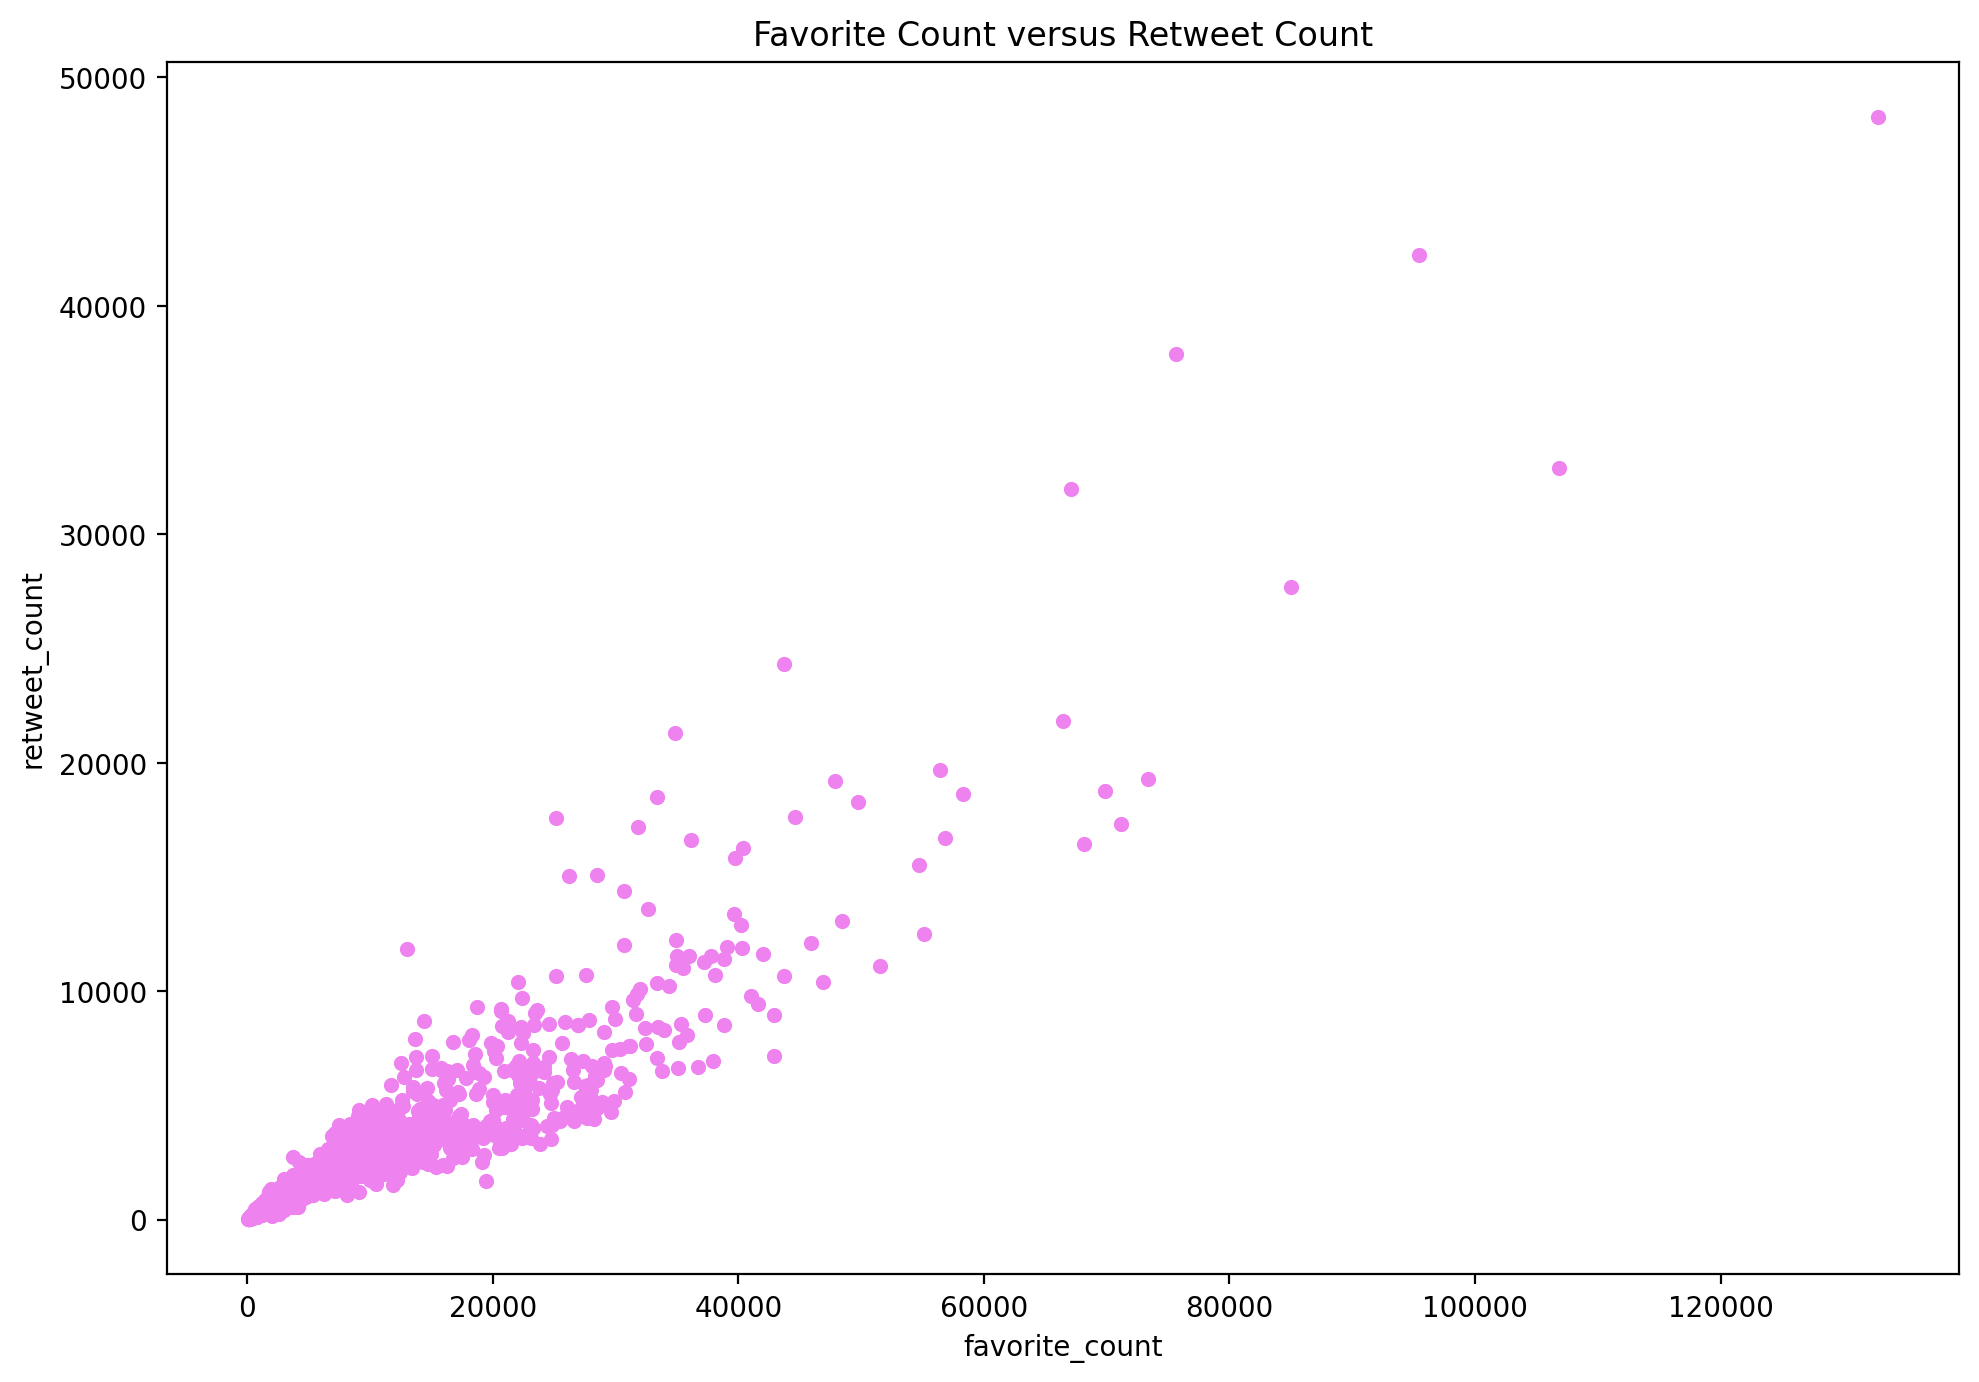

In [212]:
# Plot
plot = master_df.plot(kind='scatter', x='favorite_count', y='retweet_count', c='violet')

plot.set_title('Favorite Count versus Retweet Count')

plot.figure.set_size_inches(10, 7)

plt.tight_layout()

plt.savefig('re_fav.png')

# Display the plot
plt.show()

In [213]:
correlation = master_df['favorite_count'].corr(master_df['retweet_count'])

print(f"Correlation between favorites and retweets: {correlation}")

Correlation between favorites and retweets: 0.9262617424922748


<h3 style="color:#BA55D3">2. What is the most popular dog stage?</h3>

In [214]:
master_df['dog_stage_list'] = master_df['dog_stage'].str.split(',')

master_exploded = master_df.explode('dog_stage_list')

popularity = master_exploded.groupby('dog_stage_list')['favorite_count'].sum().sort_values(ascending=False)

# Display result
print(popularity)


dog_stage_list
None       11701895
pupper      1245067
doggo        856549
puppo        498458
floofer       86366
Name: favorite_count, dtype: int64


<h3 style="color:#BA55D3">3. What is the most popular breed?</h3>

In [215]:
# Count how many times each breed was predicted
breed_counts = master_df['p'].value_counts()

# Display top breeds
print(breed_counts.head(10))

p
golden_retriever      132
labrador_retriever     87
pembroke               83
chihuahua              73
pug                    50
chow                   39
pomeranian             37
toy_poodle             37
samoyed                32
french_bulldog         29
Name: count, dtype: int64


<h3 style="color:#BA55D3">4. What is the most popular dog name?</h3>

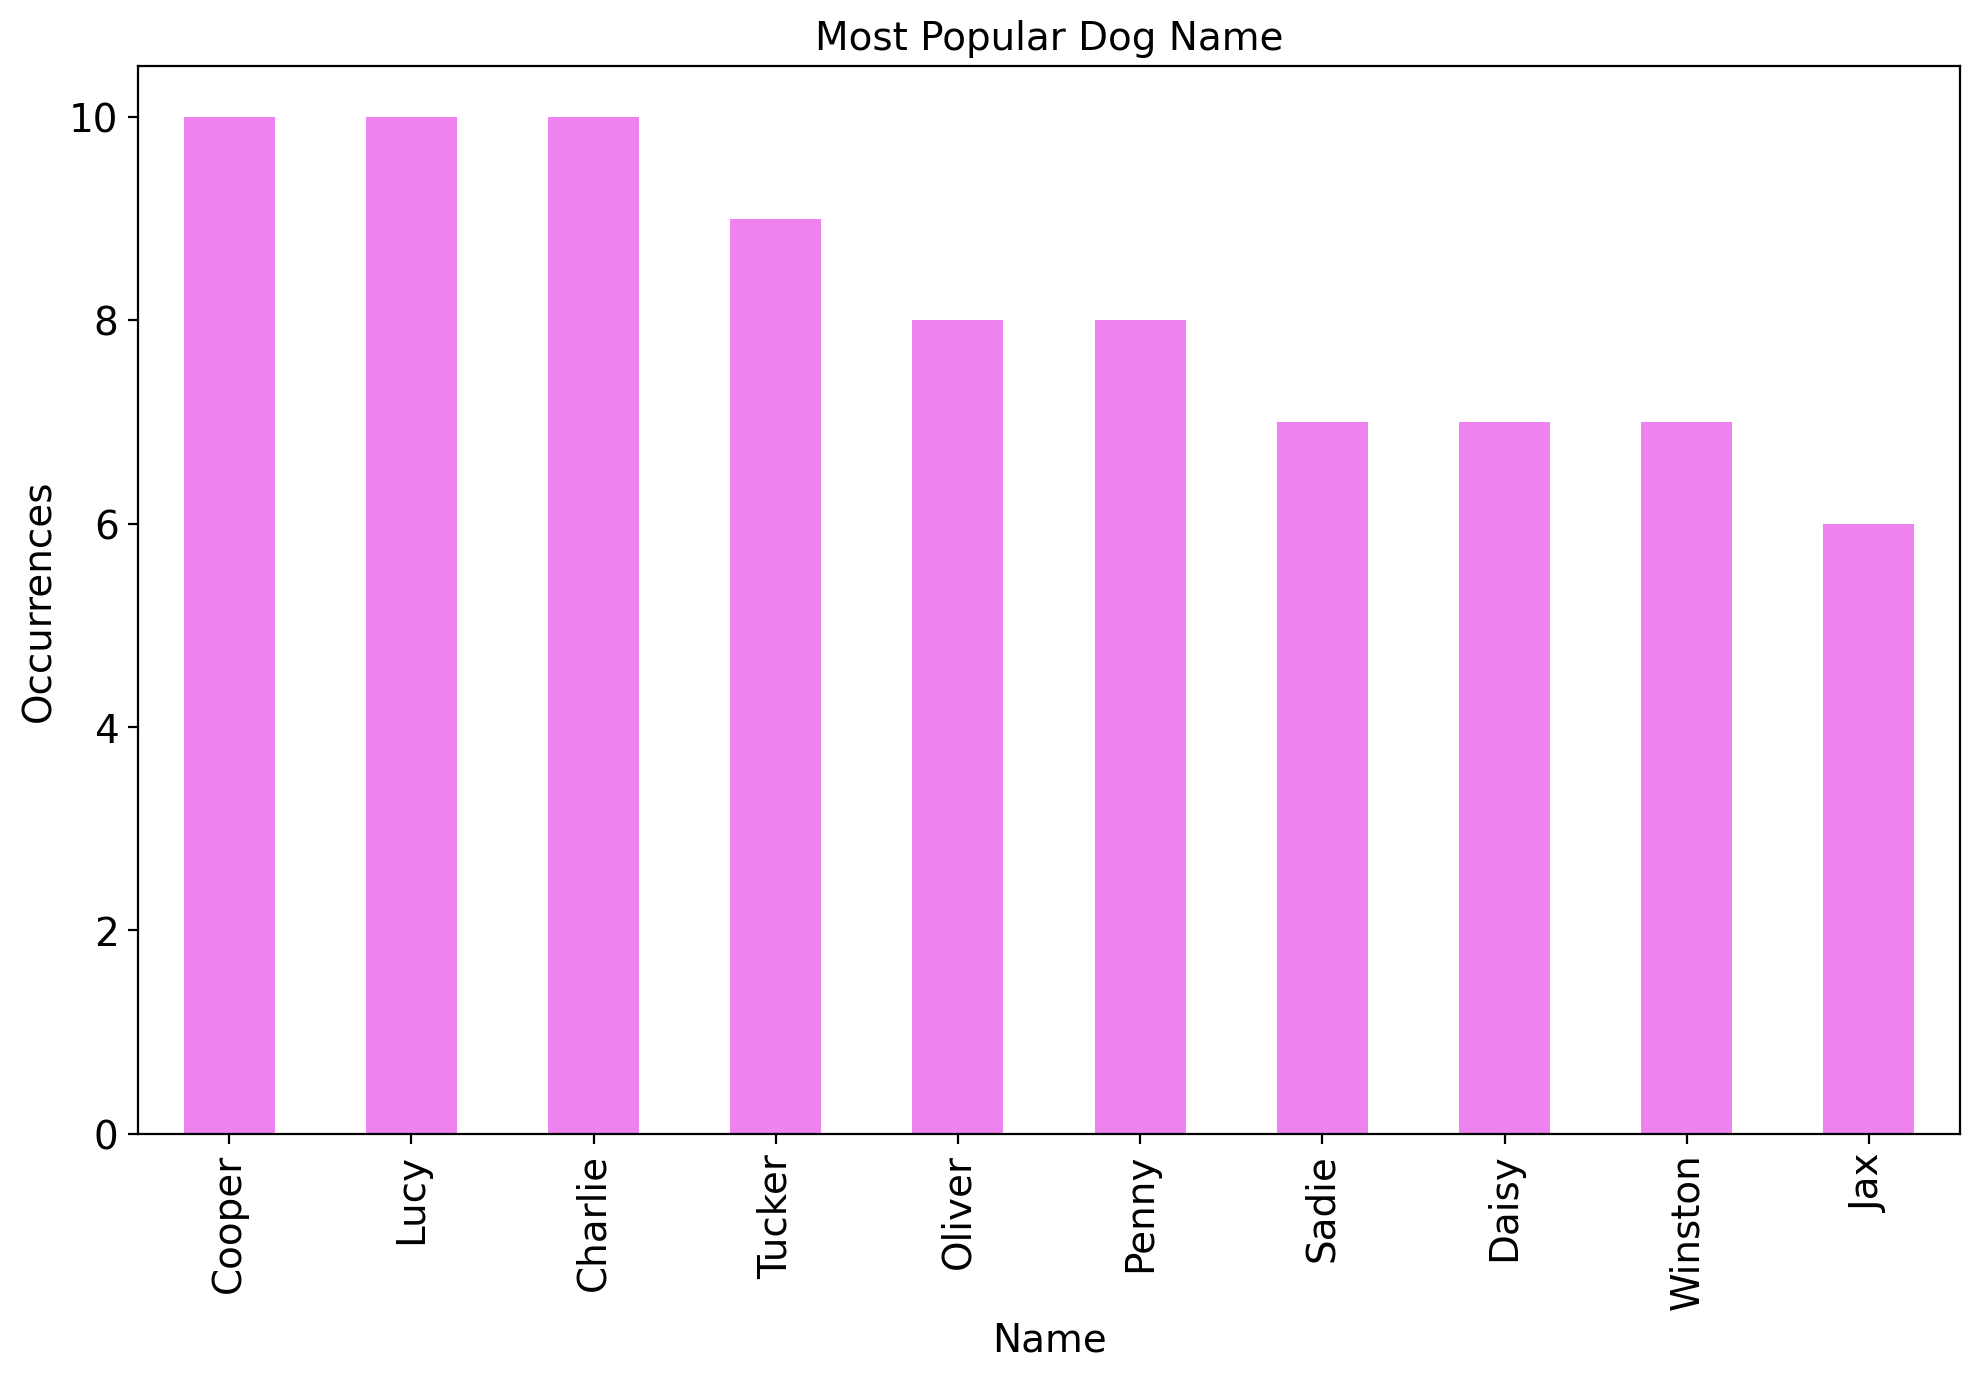

In [216]:
# Exclude Unknown names
pname = master_df[master_df['name'] != 'Unknown']['name'].value_counts().head(10)

# Plot
g_bar = pname.plot.bar(color='violet', fontsize=14)
g_bar.figure.set_size_inches(10, 7)

plt.title('Most Popular Dog Name', color='black', fontsize=14)
plt.xlabel('Name', color='black', fontsize=14)
plt.ylabel('Occurrences', color='black', fontsize=14)

plt.tight_layout()

plt.savefig('top_names.png')  

plt.show()